In [1]:
import os
import gdown
from src import config
import seaborn as sns
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
from sklearn import datasets
import pandas as pd
import numpy as np
import sweetviz


## Data Download

In [2]:
if not os.path.exists(config.DATASET_TRAIN):
        gdown.download(config.DATASET_TRAIN_URL, config.DATASET_TRAIN, quiet=False)

app_train = pq.read_table(config.DATASET_TRAIN)
app_train = app_train.to_pandas()

# Download application_test_aai.csv
if not os.path.exists(config.DATASET_TEST):
        gdown.download(config.DATASET_TEST_URL, config.DATASET_TEST, quiet=False)

app_test = pq.read_table(config.DATASET_TEST)
app_test = app_test.to_pandas()

In [4]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import seaborn as sns



In [3]:
app_train.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.588295e+06,3588295,3588295,3.458771e+06,3.588295e+06,3.458771e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.458771e+06,3.458771e+06
mean,1.713103e+00,2022-05-16 07:50:29.219312,2022-05-16 08:08:42.275203,1.393923e+00,6.856861e+00,1.365674e+00,1.645738e+02,1.625517e+02,1.183209e+00,1.516813e+01,1.020728e+00,4.891096e-01,2.824744e+00,5.827756e-01,2.964299e-01,2.207840e+01,2.282808e+00,1.008364e-01
min,1.000000e+00,2003-01-01 00:06:06,2003-01-01 00:31:38,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,2022-05-08 18:14:16.500000,2022-05-08 18:32:36,1.000000e+00,1.150000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,2022-05-16 09:14:42,2022-05-16 09:33:15,1.000000e+00,1.960000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,2022-05-23 18:03:17,2022-05-23 18:21:03.500000,1.000000e+00,3.730000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00
max,6.000000e+00,2022-06-01 23:55:30,2022-06-02 00:03:51,9.000000e+00,3.571927e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00
std,4.888093e-01,NaN,NaN,9.555489e-01,6.908488e+02,5.239789e+00,6.562813e+01,7.027926e+01,5.075988e-01,1.489484e+01,1.256724e+00,9.008878e-02,3.368739e+00,2.173699e+00,4.576907e-02,1.848683e+01,7.452415e-01,3.434480e-01


In [4]:
columns_to_convert = ['VendorID', 'RatecodeID','PULocationID', 'DOLocationID', 'payment_type']
app_train[columns_to_convert] = app_train[columns_to_convert].astype('object')
app_test[columns_to_convert] = app_test[columns_to_convert].astype('object')

In [5]:
app_train.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3588295,3588295,3.458771e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.588295e+06,3.458771e+06,3.458771e+06
mean,2022-05-16 07:50:29.219312,2022-05-16 08:08:42.275203,1.393923e+00,6.856861e+00,1.516813e+01,1.020728e+00,4.891096e-01,2.824744e+00,5.827756e-01,2.964299e-01,2.207840e+01,2.282808e+00,1.008364e-01
min,2003-01-01 00:06:06,2003-01-01 00:31:38,0.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00
25%,2022-05-08 18:14:16.500000,2022-05-08 18:32:36,1.000000e+00,1.150000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00
50%,2022-05-16 09:14:42,2022-05-16 09:33:15,1.000000e+00,1.960000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00
75%,2022-05-23 18:03:17,2022-05-23 18:21:03.500000,1.000000e+00,3.730000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00
max,2022-06-01 23:55:30,2022-06-02 00:03:51,9.000000e+00,3.571927e+05,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00
std,NaN,NaN,9.555489e-01,6.908488e+02,1.489484e+01,1.256724e+00,9.008878e-02,3.368739e+00,2.173699e+00,4.576907e-02,1.848683e+01,7.452415e-01,3.434480e-01


In [6]:
from src import data_utils
app_train = data_utils.agregate_columns(app_train)

In [7]:
app_train.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration_in_minutes,pickup_year,pickup_day,pickup_day_of_week,pickup_minute,trips_per_hour,average_speed_per_hour
count,3.457129e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.457129e+06,3.457129e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06,3.586533e+06
mean,1.394059e+00,6.860030e+00,1.516509e+01,1.020390e+00,4.891665e-01,2.825610e+00,5.828125e-01,2.964626e-01,2.207681e+01,2.283226e+00,1.008199e-01,1.822655e+01,2.022000e+03,1.573727e+01,2.917960e+00,2.946862e+01,1.859709e+05,2.641754e+01
std,9.556232e-01,6.910184e+02,1.488037e+01,1.256505e+00,8.993297e-02,3.368433e+00,2.173692e+00,4.566822e-02,1.847592e+01,7.446806e-01,3.434243e-01,5.157771e+01,2.864553e-02,8.702503e+00,2.000681e+00,1.733539e+01,5.292819e+04,1.770262e+01
min,0.000000e+00,0.000000e+00,-1.311500e+03,-4.500000e+00,-5.000000e-01,-1.457000e+02,-5.075000e+01,-3.000000e-01,-1.314800e+03,-2.500000e+00,-1.250000e+00,-1.408333e+01,2.003000e+03,1.000000e+00,0.000000e+00,0.000000e+00,1.973800e+04,1.308690e+01
25%,1.000000e+00,1.150000e+00,7.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.235000e+01,2.500000e+00,0.000000e+00,7.666667e+00,2.022000e+03,8.000000e+00,1.000000e+00,1.400000e+01,1.703370e+05,1.679389e+01
50%,1.000000e+00,1.960000e+00,1.050000e+01,5.000000e-01,5.000000e-01,2.160000e+00,0.000000e+00,3.000000e-01,1.630000e+01,2.500000e+00,0.000000e+00,1.271667e+01,2.022000e+03,1.600000e+01,3.000000e+00,3.000000e+01,1.964740e+05,2.213442e+01
75%,1.000000e+00,3.730000e+00,1.700000e+01,2.500000e+00,5.000000e-01,3.460000e+00,0.000000e+00,3.000000e-01,2.376000e+01,2.500000e+00,0.000000e+00,2.061667e+01,2.022000e+03,2.300000e+01,5.000000e+00,4.400000e+01,2.218730e+05,2.452387e+01
max,9.000000e+00,3.571927e+05,6.966500e+03,8.800000e+00,3.300000e+00,6.650000e+02,8.137500e+02,3.000000e-01,6.970800e+03,2.750000e+00,1.250000e+00,6.823550e+03,2.022000e+03,3.100000e+01,6.000000e+00,5.900000e+01,2.533140e+05,8.652700e+01


In [59]:
trips = pq.read_table(config.DATASET_TRAIN)
trips = trips.to_pandas()

In [62]:
#my_report.show_html() # Not providing a filename will default to SWEETVIZ_REPORT.html

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [63]:
# Visualization of the data of the first 5 rows
app_train.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0


In [73]:
# Convert the 'start_time' column to datetime
app_train['tpep_pickup_datetime'] = pd.to_datetime(app_train['tpep_pickup_datetime'])
app_test['tpep_pickup_datetime'] = pd.to_datetime(app_test['tpep_pickup_datetime'])
# Extract the hour from each start time
app_train['start_hour'] = app_train['tpep_pickup_datetime'].dt.hour
app_test['start_hour'] = app_test['tpep_pickup_datetime'].dt.hour

app_test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,start_hour
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,32.0,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00,0
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,14.0,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00,0
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,26.0,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25,0
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,37.0,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25,0
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,9.0,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00,0


In [74]:
app_train['trips_per_hour'] = app_train['start_hour'].map(app_train['start_hour'].value_counts())
app_test['trips_per_hour'] = app_test['start_hour'].map(app_test['start_hour'].value_counts())
app_test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,...,3.00,0.5,2.00,6.55,0.3,44.35,2.5,0.00,0,976
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,...,3.00,0.5,0.00,0.00,0.3,17.80,2.5,0.00,0,976
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,...,0.50,0.5,5.00,6.55,0.3,42.60,2.5,1.25,0,976
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,...,1.75,0.5,0.00,0.00,0.3,39.55,0.0,1.25,0,976
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,...,3.00,0.5,2.55,0.00,0.3,15.35,2.5,0.00,0,976


In [75]:
# Convert the time columns to datetime
app_train['time1'] = pd.to_datetime(app_train['tpep_pickup_datetime'])
app_train['time2'] = pd.to_datetime(app_train['tpep_dropoff_datetime'])

# Calculate the difference in hours
app_train['time_diff'] = (app_train['time2'] - app_train['time1']).dt.total_seconds() / 3600

# Convert the time columns to datetime
app_test['time1'] = pd.to_datetime(app_test['tpep_pickup_datetime'])
app_test['time2'] = pd.to_datetime(app_test['tpep_dropoff_datetime'])

# Calculate the difference in hours
app_test['time_diff'] = (app_test['time2'] - app_test['time1']).dt.total_seconds() / 3600

app_test.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,...,6.55,0.3,44.35,2.5,0.00,0,976,2022-06-01 00:25:41,2022-06-01 00:48:22,0.378056
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,...,0.00,0.3,17.80,2.5,0.00,0,976,2022-06-01 00:44:40,2022-06-01 01:01:48,0.285556
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,...,6.55,0.3,42.60,2.5,1.25,0,976,2022-06-01 00:23:07,2022-06-01 00:39:50,0.278611
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,...,0.00,0.3,39.55,0.0,1.25,0,976,2022-06-01 00:25:53,2022-06-01 00:57:06,0.520278
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,...,0.00,0.3,15.35,2.5,0.00,0,976,2022-06-01 00:23:58,2022-06-01 00:33:43,0.162500


In [76]:
# Calculate speed in miles per hour
app_train['speed'] = app_train['trip_distance'] / app_train['time_diff']
# Calculate speed in miles per hour
app_test['speed'] = app_test['trip_distance'] / app_test['time_diff']
app_test.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff,speed
0,1,2022-06-01 00:25:41,2022-06-01 00:48:22,1.0,11.00,1.0,N,70,48,1,...,0.3,44.35,2.5,0.00,0,976,2022-06-01 00:25:41,2022-06-01 00:48:22,0.378056,29.096253
1,1,2022-06-01 00:44:40,2022-06-01 01:01:48,1.0,4.20,1.0,N,170,226,1,...,0.3,17.80,2.5,0.00,0,976,2022-06-01 00:44:40,2022-06-01 01:01:48,0.285556,14.708171
2,2,2022-06-01 00:23:07,2022-06-01 00:39:50,1.0,9.49,1.0,N,264,113,1,...,0.3,42.60,2.5,1.25,0,976,2022-06-01 00:23:07,2022-06-01 00:39:50,0.278611,34.061815
3,1,2022-06-01 00:25:53,2022-06-01 00:57:06,2.0,12.10,1.0,N,132,17,2,...,0.3,39.55,0.0,1.25,0,976,2022-06-01 00:25:53,2022-06-01 00:57:06,0.520278,23.256807
4,1,2022-06-01 00:23:58,2022-06-01 00:33:43,0.0,1.80,1.0,N,140,163,1,...,0.3,15.35,2.5,0.00,0,976,2022-06-01 00:23:58,2022-06-01 00:33:43,0.162500,11.076923


In [68]:
app_train['speed'].isna().any()

True

In [69]:
app_train['time_diff'].eq(0).any()

True

In [77]:
# Remove rows whetrips['time_diff'].eq(0).any().re 'speed' is NaN or 'time_diff' is zero
app_train = app_train.dropna(subset=['speed'])
app_train = app_train[app_train['time_diff'] != 0]

# Now calculate the average speed per hour
average_speed_per_hour = app_train.groupby('start_hour')['speed'].mean()
app_train['average_speed_per_hour'] = app_train['start_hour'].map(average_speed_per_hour)

# Remove rows whetrips['time_diff'].eq(0).any().re 'speed' is NaN or 'time_diff' is zero
app_test = app_test.dropna(subset=['speed'])
app_test = app_test[app_test['time_diff'] != 0]

# Now calculate the average speed per hour
average_speed_per_hour = app_test.groupby('start_hour')['speed'].mean()
app_test['average_speed_per_hour'] = app_test['start_hour'].map(average_speed_per_hour)

In [85]:
app_train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'start_hour',
       'trips_per_hour', 'time1', 'time2', 'time_diff', 'speed',
       'average_speed_per_hour'],
      dtype='object')

In [86]:
app_train = app_train.drop('tpep_dropoff_datetime', axis=1)
app_train = app_train.drop('start_hour', axis=1)
app_train = app_train.drop('time1', axis=1)
app_train = app_train.drop('time2', axis=1)
app_train = app_train.drop('speed', axis=1)

app_test = app_test.drop('tpep_dropoff_datetime', axis=1)
app_test = app_test.drop('start_hour', axis=1)
app_test = app_test.drop('time1', axis=1)
app_test = app_test.drop('time2', axis=1)
app_test = app_test.drop('speed', axis=1)


In [93]:
app_train.columns

Index(['VendorID', 'tpep_pickup_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'trips_per_hour', 'time_diff',
       'average_speed_per_hour'],
      dtype='object')

In [88]:
my_report = sweetviz.compare([app_train, "app_train"], [app_test, "app_test"], "time_diff")

                                             |          | [  0%]   00:00 -> (? left)

In [89]:
my_report.show_html("Report.html") # Si no se proporciona un nombre de archivo, el valor predeterminado será SWEETVIZ_REPORT.html

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [98]:
app_train.value_counts()

VendorID  tpep_pickup_datetime  passenger_count  trip_distance  RatecodeID  store_and_fwd_flag  PULocationID  DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  improvement_surcharge  total_amount  congestion_surcharge  airport_fee  trips_per_hour  time_diff  average_speed_per_hour
1         2022-05-01 00:00:04   1.0              1.30           1.0         N                   238           143           1             6.5          3.0    0.5      7.00        0.0           0.3                    17.30         2.5                   0.0          101831          0.134722   25.577794                 1
2         2022-05-16 23:08:08   1.0              1.66           1.0         N                   162           230           1             7.5          0.5    0.5      2.00        0.0           0.3                    13.30         2.5                   0.0          143610          0.125556   24.172844                 1
          2022-05-16 23:07:41   1.0          

In [95]:
import pandas as pd
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia
contingency_table = pd.crosstab(app_train['payment_type'], app_train['RatecodeID'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("chi2 statistic", chi2)
print("p-value", p)
print("degrees of freedom", dof)
print("expected contingency table", expected)

chi2 statistic 9396.655195014435
p-value 0.0
degrees of freedom 18
expected contingency table [[2.56147726e+06 1.15744394e+05 9.15051013e+03 3.63786079e+03
  2.21284841e+04 3.06826494e+01 7.67380929e+03]
 [6.63984532e+05 3.00031894e+04 2.37198951e+03 9.43003997e+02
  5.73613179e+03 7.95353717e+00 1.98920004e+03]
 [1.53396139e+04 6.93144676e+02 5.47985707e+01 2.17856239e+01
  1.32518218e+02 1.83745530e-01 4.59552282e+01]
 [1.50325956e+04 6.79271569e+02 5.37017919e+01 2.13495904e+01
  1.29865901e+02 1.80067912e-01 4.50354465e+01]]


In [72]:
# Show info about the data type of every column
app_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3586533 entries, 0 to 3588294
Data columns (total 26 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   VendorID                int64         
 1   tpep_pickup_datetime    datetime64[us]
 2   tpep_dropoff_datetime   datetime64[us]
 3   passenger_count         float64       
 4   trip_distance           float64       
 5   RatecodeID              float64       
 6   store_and_fwd_flag      object        
 7   PULocationID            int64         
 8   DOLocationID            int64         
 9   payment_type            int64         
 10  fare_amount             float64       
 11  extra                   float64       
 12  mta_tax                 float64       
 13  tip_amount              float64       
 14  tolls_amount            float64       
 15  improvement_surcharge   float64       
 16  total_amount            float64       
 17  congestion_surcharge    float64       
 18  airport

In [16]:
# Check for missing values for each column
trips.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count           129404
trip_distance                  0
RatecodeID                129404
store_and_fwd_flag        129404
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge      129404
airport_fee               129404
start_hour                     0
trips_per_hour                 0
time1                          0
time2                          0
time_diff                      0
speed                          0
average_speed_per_hour         0
dtype: int64

## Understanding columns with discrete data (limited to a few unique values)

In [17]:
trips.passenger_count.value_counts()


passenger_count
1.0    2548670
2.0     538855
3.0     136955
0.0      73401
5.0      61207
4.0      56066
6.0      41944
7.0         15
8.0         14
9.0          2
Name: count, dtype: int64

In [18]:
trips.airport_fee.value_counts()


airport_fee
 0.00    3173689
 1.25     281139
-1.25       2301
Name: count, dtype: int64

In [19]:
trips.RatecodeID.value_counts()


RatecodeID
1.0     3255834
2.0      147120
5.0       28127
3.0       11631
99.0       9754
4.0        4624
6.0          39
Name: count, dtype: int64

In [20]:
trips.store_and_fwd_flag.value_counts()


store_and_fwd_flag
N    3402618
Y      54511
Name: count, dtype: int64

In [21]:
trips.payment_type.value_counts()

payment_type
1    2719843
2     705036
0     129404
3      16288
4      15962
Name: count, dtype: int64

In [22]:
trips.extra.value_counts()


extra
 0.00    1477480
 0.50     649485
 2.50     506066
 1.00     441788
 3.00     234772
 3.50     176131
 3.75      27025
 4.50      19515
 1.25      16374
 1.75      10466
-0.50       6388
 2.25       4353
 4.25       4090
 8.25       3491
-1.00       3204
 4.75       2918
 7.00       2070
 5.75        346
-4.50        310
 4.00         67
 3.25         31
 2.00         28
 0.80         26
 3.30         22
 1.80         11
 3.80         11
 1.30         10
 4.30          7
-2.50          7
 1.50          4
-2.00          4
 5.30          3
 2.80          2
-3.00          2
 3.55          1
 2.81          1
 2.90          1
 8.30          1
 2.67          1
 4.79          1
 5.25          1
 0.09          1
 0.06          1
 8.80          1
 0.55          1
 1.55          1
 4.80          1
 4.55          1
 6.30          1
 2.95          1
 0.02          1
 7.50          1
 7.05          1
 1.02          1
 7.80          1
 6.55          1
 0.05          1
 8.55          1
 2.51   

In [23]:
# PULocationID and DOLocationID can have 265 different values
# refer to https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv

trips.PULocationID.value_counts()


PULocationID
132    175781
237    173492
236    152361
161    138498
142    120313
        ...  
84          1
105         1
187         1
221         1
199         1
Name: count, Length: 259, dtype: int64

In [24]:
trips.DOLocationID.value_counts()


DOLocationID
236    155636
237    150510
161    130887
230    106288
170    102735
        ...  
30         19
84         18
2           5
105         3
99          2
Name: count, Length: 261, dtype: int64

## Looking into missing values

In [25]:
# Print the number and percentage of missing values in each column
nan_count = trips.isna().sum()
nan_count = nan_count[nan_count > 0]

print('Quantity of missing values')
print(nan_count)
print('______________')


nan_count = (trips.isna().sum() / len(trips)) * 100
nan_count = nan_count[nan_count > 0]
print(nan_count)

# Finding: the quantity of missing values is the same for all the columns where there is missing data
# but they are the same rows?

Quantity of missing values
passenger_count         129404
RatecodeID              129404
store_and_fwd_flag      129404
congestion_surcharge    129404
airport_fee             129404
dtype: int64
______________
passenger_count         3.608053
RatecodeID              3.608053
store_and_fwd_flag      3.608053
congestion_surcharge    3.608053
airport_fee             3.608053
dtype: float64


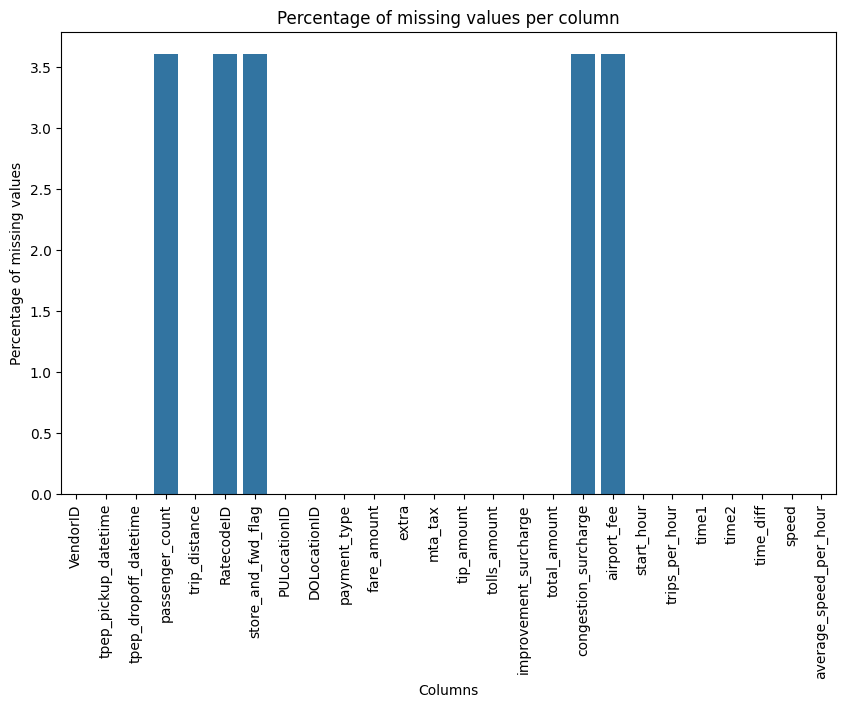

In [26]:
missing_values_percentage = (trips.isnull().sum() / len(trips)) * 100

# Display the percentage of missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage)
plt.title('Percentage of missing values ​​per column')
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.xticks(rotation=90)
plt.show()

In [27]:
trips_with_missing_values = trips[trips.isnull().any(axis=1)]
trips_with_missing_values.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,total_amount,congestion_surcharge,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff,speed,average_speed_per_hour
3458771,2,2022-05-01 00:01:17,2022-05-01 00:18:38,NaN,4.93,NaN,None,166,163,0,...,29.45,NaN,NaN,0,101898,2022-05-01 00:01:17,2022-05-01 00:18:38,0.289167,17.048991,25.577794
3458772,2,2022-05-01 00:40:00,2022-05-01 00:50:00,NaN,1.48,NaN,None,190,97,0,...,13.18,NaN,NaN,0,101898,2022-05-01 00:40:00,2022-05-01 00:50:00,0.166667,8.880000,25.577794
3458773,1,2022-05-01 00:08:38,2022-05-01 00:28:26,NaN,3.90,NaN,None,239,234,0,...,24.36,NaN,NaN,0,101898,2022-05-01 00:08:38,2022-05-01 00:28:26,0.330000,11.818182,25.577794
3458774,2,2022-05-01 00:34:59,2022-05-01 01:12:00,NaN,13.16,NaN,None,61,151,0,...,57.62,NaN,NaN,0,101898,2022-05-01 00:34:59,2022-05-01 01:12:00,0.616944,21.330932,25.577794
3458775,2,2022-05-01 00:12:00,2022-05-01 00:25:00,NaN,4.29,NaN,None,79,262,0,...,23.95,NaN,NaN,0,101898,2022-05-01 00:12:00,2022-05-01 00:25:00,0.216667,19.800000,25.577794


In [28]:
# Validate that empty (NaN) values ​​in multiple columns belong to the same rows
columns_to_validate = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']

# Create a new column indicating whether all columns are empty in a specific row
trips_with_missing_values['empty_columns'] = trips_with_missing_values[columns_to_validate].isnull().all(axis=1)

# Check for rows where all columns are empty
trips_with_missing_values = trips_with_missing_values[trips_with_missing_values['empty_columns'] == True]

# Imprimir el numero de filas con valores vacíos en las columnas especificadas
print(trips_with_missing_values.empty_columns.value_counts())

# The number of rows with empty values in the specified columns is 129524, so we can say all 
# rows with missing values in the columns are the same

empty_columns
True    129404
Name: count, dtype: int64


C:\Users\Cesar_Maydana\AppData\Local\Temp\ipykernel_25092\4283347084.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips_with_missing_values['empty_columns'] = trips_with_missing_values[columns_to_validate].isnull().all(axis=1)


In [29]:
# All rows have the same value for the payment_type column, they seems to be canceled trips
# In Documentation, payment method valid values are only from 1 to 6
# So we can assume that the value 0 is a missing value

# Also, 
print(trips_with_missing_values.payment_type.value_counts().sort_index())
trips_with_missing_values.head(5).T

payment_type
0    129404
Name: count, dtype: int64


,3458771,3458772,3458773,3458774,3458775
VendorID,2,2,1,2,2
tpep_pickup_datetime,2022-05-01 00:01:17,2022-05-01 00:40:00,2022-05-01 00:08:38,2022-05-01 00:34:59,2022-05-01 00:12:00
tpep_dropoff_datetime,2022-05-01 00:18:38,2022-05-01 00:50:00,2022-05-01 00:28:26,2022-05-01 01:12:00,2022-05-01 00:25:00
passenger_count,NaN,NaN,NaN,NaN,NaN
trip_distance,4.93,1.48,3.9,13.16,4.29
RatecodeID,NaN,NaN,NaN,NaN,NaN
store_and_fwd_flag,None,None,None,None,None
PULocationID,166,190,239,61,79
DOLocationID,163,97,234,151,262
payment_type,0,0,0,0,0


In [30]:
trips_with_missing_values = trips_with_missing_values.dropna(subset=['passenger_count'])

In [31]:
print(trips_with_missing_values.payment_type.value_counts().sort_index())
trips_with_missing_values.head(5).T

Series([], Name: count, dtype: int64)


""
VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
RatecodeID
store_and_fwd_flag
PULocationID
DOLocationID
payment_type


In [32]:
trips = trips.dropna(subset=['passenger_count'])

In [33]:
# Print the number and percentage of missing values in each column
nan_count = trips.isna().sum()
nan_count = nan_count[nan_count > 0]

print('Quantity of missing values')
print(nan_count)
print('______________')


nan_count = (trips.isna().sum() / len(trips)) * 100
nan_count = nan_count[nan_count > 0]
print(nan_count)

# Finding: the quantity of missing values is the same for all the columns where there is missing data
# but they are the same rows?

Quantity of missing values
Series([], dtype: int64)
______________
Series([], dtype: float64)


In [34]:
# total amount / distancia
# $50 alrededor es por aeropuerto
#plot_hist(trips["fare_amount"], title= 'Fare_Amount', xlabel='Amount', ylabel='value_Counts')

In [35]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [10, 6]

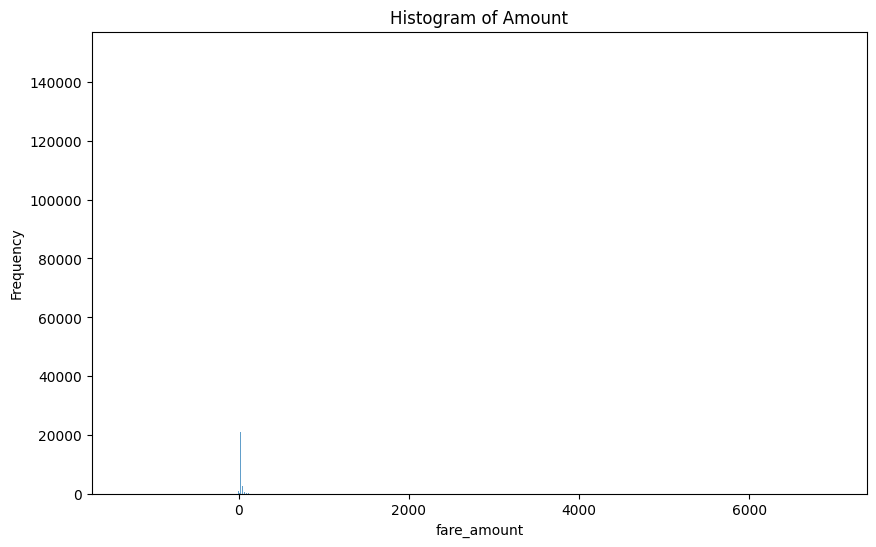

In [36]:
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame y 'amount' es tu columna de interés
plt.hist(trips['fare_amount'], bins='auto', alpha=0.7, rwidth=0.85)

plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')

plt.show()

In [37]:
mean = trips['fare_amount'].mean()
std = trips['fare_amount'].std()

trips['fare_amount_sigmas'] = (trips['fare_amount'] - mean) / std

In [38]:
trips.count()

VendorID                  3457129
tpep_pickup_datetime      3457129
tpep_dropoff_datetime     3457129
passenger_count           3457129
trip_distance             3457129
RatecodeID                3457129
store_and_fwd_flag        3457129
PULocationID              3457129
DOLocationID              3457129
payment_type              3457129
fare_amount               3457129
extra                     3457129
mta_tax                   3457129
tip_amount                3457129
tolls_amount              3457129
improvement_surcharge     3457129
total_amount              3457129
congestion_surcharge      3457129
airport_fee               3457129
start_hour                3457129
trips_per_hour            3457129
time1                     3457129
time2                     3457129
time_diff                 3457129
speed                     3457129
average_speed_per_hour    3457129
fare_amount_sigmas        3457129
dtype: int64

In [39]:
trips2 = trips[
  (trips['fare_amount_sigmas'] < 3) &
  (trips['fare_amount_sigmas'] > -3)
]

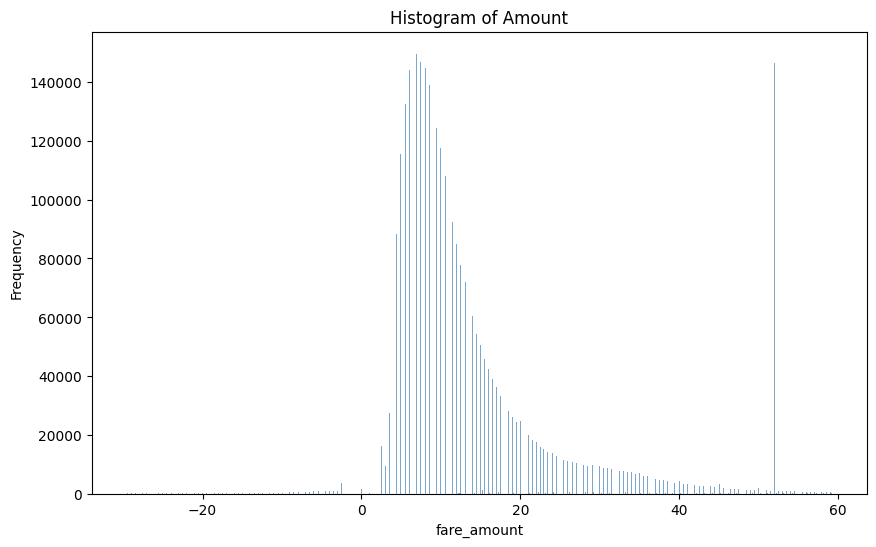

In [40]:
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame y 'amount' es tu columna de interés
plt.hist(trips2['fare_amount'], bins='auto', alpha=0.7, rwidth=0.85, color='steelblue')

plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.title('Histogram of Amount')

plt.show()

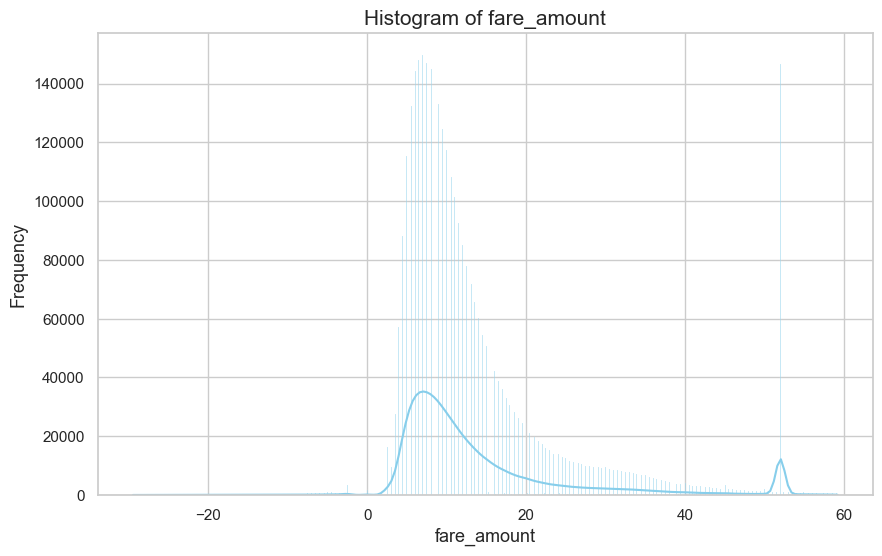

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Seaborn
sns.set(style="whitegrid")

# Asumiendo que 'trips2' es tu DataFrame y 'fare_amount' es tu columna de interés
plt.figure(figsize=(10,6)) # Ajusta el tamaño de la figura
sns.histplot(trips2['fare_amount'], bins='auto', color='skyblue', kde=True)

plt.xlabel('fare_amount', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of fare_amount', fontsize=15)

plt.show()

<Axes: xlabel='fare_amount'>

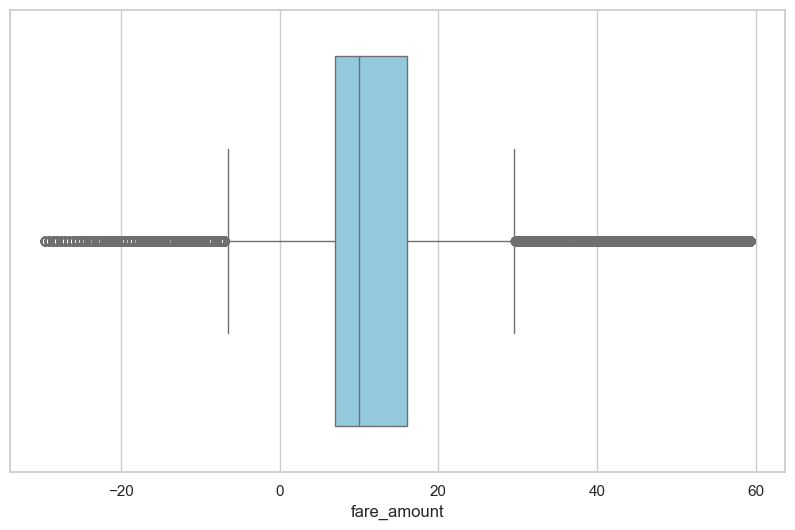

In [42]:
# total amount / distancia
# $50 alrededor es por aeropuerto

sns.boxplot(data=trips2, x='fare_amount', color='skyblue')  # Cambiar el color del gráfico

In [43]:
trips2 = trips2[trips2['fare_amount']>0]

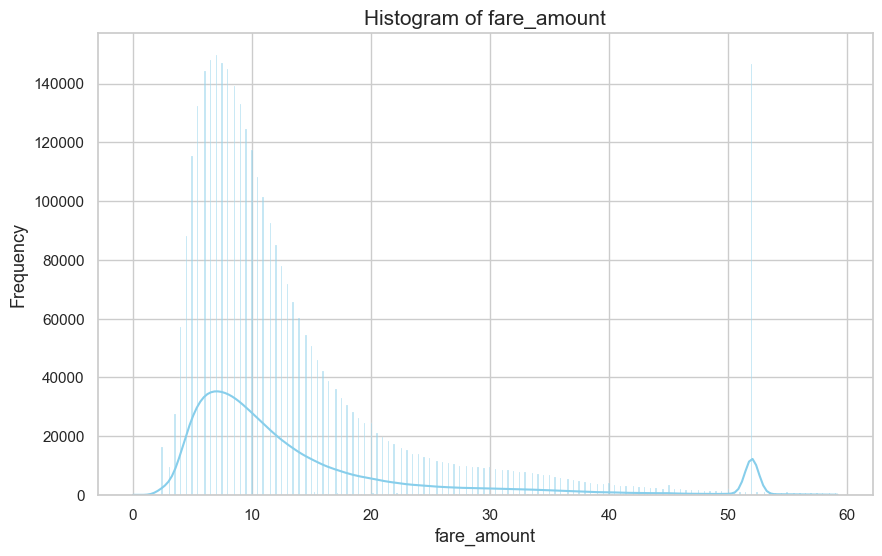

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Seaborn
sns.set(style="whitegrid")

# Asumiendo que 'trips2' es tu DataFrame y 'fare_amount' es tu columna de interés
plt.figure(figsize=(10,6)) # Ajusta el tamaño de la figura
sns.histplot(trips2['fare_amount'], bins='auto', color='skyblue', kde=True)

plt.xlabel('fare_amount', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Histogram of fare_amount', fontsize=15)

plt.show()

<Axes: xlabel='fare_amount'>

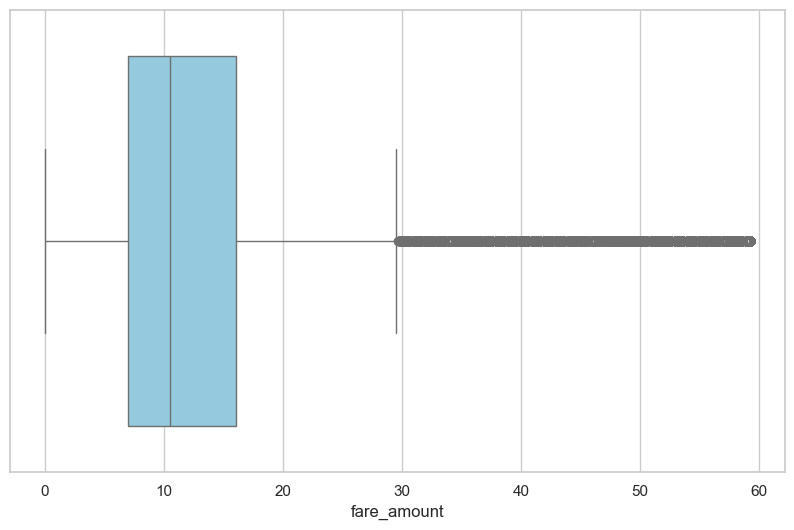

In [45]:
sns.boxplot(data=trips2, x='fare_amount', color='skyblue')  # Cambiar el color del gráfico

In [46]:
trips2.count()

VendorID                  3398517
tpep_pickup_datetime      3398517
tpep_dropoff_datetime     3398517
passenger_count           3398517
trip_distance             3398517
RatecodeID                3398517
store_and_fwd_flag        3398517
PULocationID              3398517
DOLocationID              3398517
payment_type              3398517
fare_amount               3398517
extra                     3398517
mta_tax                   3398517
tip_amount                3398517
tolls_amount              3398517
improvement_surcharge     3398517
total_amount              3398517
congestion_surcharge      3398517
airport_fee               3398517
start_hour                3398517
trips_per_hour            3398517
time1                     3398517
time2                     3398517
time_diff                 3398517
speed                     3398517
average_speed_per_hour    3398517
fare_amount_sigmas        3398517
dtype: int64

In [47]:
trips2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,congestion_surcharge,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff,speed,average_speed_per_hour,fare_amount_sigmas
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,...,2.5,0.0,0,101898,2022-05-01 00:00:36,2022-05-01 00:19:18,0.311667,13.155080,25.577794,0.142583
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,...,2.5,0.0,0,101898,2022-05-01 00:27:44,2022-05-01 00:41:33,0.230278,9.987937,25.577794,-0.262869
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,...,2.5,0.0,0,101898,2022-05-01 00:59:00,2022-05-01 01:14:22,0.256111,16.399132,25.577794,0.041220
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,...,0.0,0.0,0,101898,2022-05-01 00:48:18,2022-05-01 01:28:02,0.662222,0.000000,25.577794,1.777905
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,...,2.5,0.0,0,101898,2022-05-01 00:28:26,2022-05-01 00:37:49,0.156389,10.230906,25.577794,-0.499382


In [48]:
# Calculate the difference in min
trips2['time_diff_min'] = (trips2['time2'] - trips2['time1']).dt.total_seconds() / 60

trips2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,airport_fee,start_hour,trips_per_hour,time1,time2,time_diff,speed,average_speed_per_hour,fare_amount_sigmas,time_diff_min
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.1,1.0,N,246,151,2,...,0.0,0,101898,2022-05-01 00:00:36,2022-05-01 00:19:18,0.311667,13.155080,25.577794,0.142583,18.700000
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.3,1.0,N,238,74,2,...,0.0,0,101898,2022-05-01 00:27:44,2022-05-01 00:41:33,0.230278,9.987937,25.577794,-0.262869,13.816667
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.2,1.0,N,163,260,2,...,0.0,0,101898,2022-05-01 00:59:00,2022-05-01 01:14:22,0.256111,16.399132,25.577794,0.041220,15.366667
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.0,1.0,N,79,182,1,...,0.0,0,101898,2022-05-01 00:48:18,2022-05-01 01:28:02,0.662222,0.000000,25.577794,1.777905,39.733333
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.6,1.0,N,238,75,1,...,0.0,0,101898,2022-05-01 00:28:26,2022-05-01 00:37:49,0.156389,10.230906,25.577794,-0.499382,9.383333


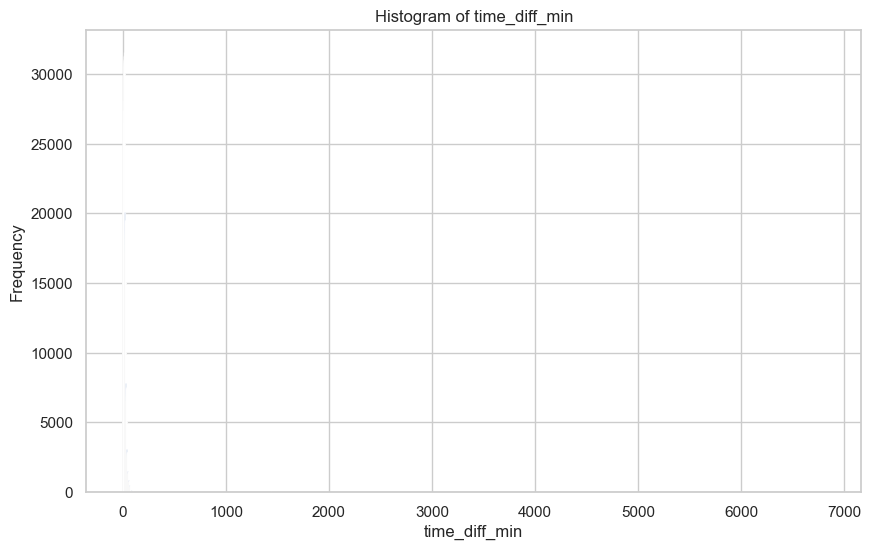

In [50]:
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame y 'amount' es tu columna de interés
plt.hist(trips2['time_diff_min'], bins='auto', alpha=0.7, rwidth=0.85)

plt.xlabel('time_diff_min')
plt.ylabel('Frequency')
plt.title('Histogram of time_diff_min')

plt.show()

In [56]:
import sweetviz

my_report = sweetviz.compare([trips2, "new"], [old, "old"], "fare_amount")



                                             |          | [  0%]   00:00 -> (? left)

KeyboardInterrupt: 

In [ ]:
my_report.show_html("Report.html") # Not providing a filename will default to SWEETVIZ_REPORT.html

In [ ]:
trips2["trip_distance"].value_counts()

trip_distance
1.00     48924
1.10     48164
0.90     47922
1.20     47413
1.30     46209
         ...  
39.20        1
32.72        1
44.50        1
29.39        1
29.62        1
Name: count, Length: 3198, dtype: int64

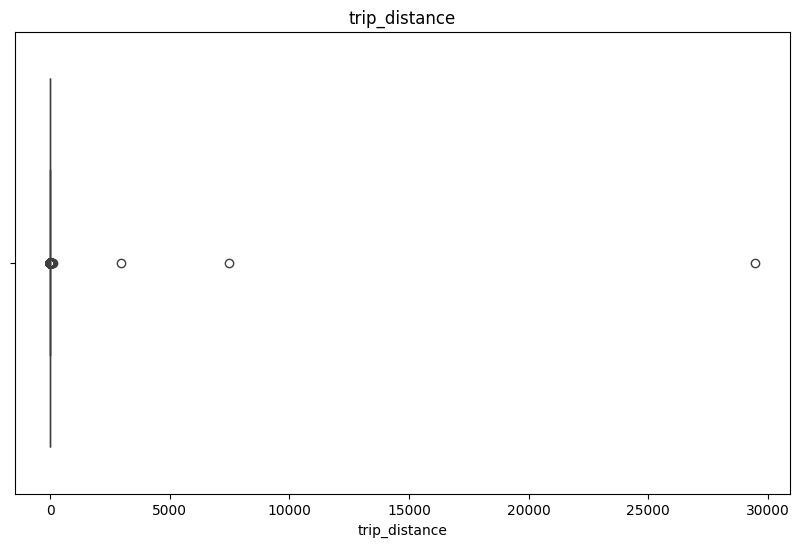

In [ ]:
sns.boxplot(data=trips2, x='trip_distance').set_title('trip_distance')
plt.show()

0.0
14.4


<Axes: xlabel='trip_distance'>

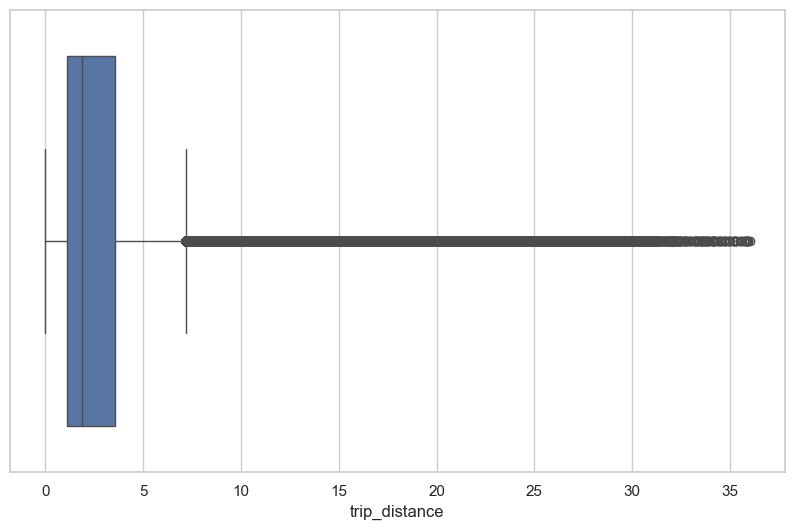

In [ ]:
# Calcular el IQR
Q1 = np.percentile(trips2['trip_distance'], 0)
print(Q1)
Q3 = np.percentile(trips2['trip_distance'], 95)
print(Q3)
IQR = Q3 - Q1

# Definir un factor mayor para incluir más datos
factor = 1.5

# Filtrar los valores dentro del rango ampliado
filtered_trips = trips2[(trips2['trip_distance'] >= Q1 - factor * IQR) & (trips2['trip_distance'] <= Q3 + factor * IQR)]

# Crear el boxplot con los datos filtrados
sns.boxplot(x=filtered_trips['trip_distance'])

In [ ]:
filtered_trips.shape

(3399773, 20)

In [ ]:
filtered_trips.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
fare_amount_sigmas       0
dtype: int64

In [ ]:
# buscamos concentracion de datos, debido a que los graficos anteriores no arrojan informacion suficiente.

In [ ]:
#filtered_trips.plot.scatter('trip_distance', 'total_amount')

In [ ]:
#filtered_trips["RatecodeID"].value_counts()

In [ ]:
#filtered_trips=filtered_trips["RatecodeID"] <= 6

In [ ]:
#filtered_trips["RatecodeID"].value_counts()

In [ ]:
#filtered_trips=filtered_trips[pickup_year]==2022

In [ ]:
filtered_trips

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,fare_amount_sigmas
0,1,2022-05-01 00:00:36,2022-05-01 00:19:18,1.0,4.10,1.0,N,246,151,2,17.0,3.0,0.5,0.00,0.0,0.3,20.80,2.5,0.0,0.142250
1,1,2022-05-01 00:27:44,2022-05-01 00:41:33,1.0,2.30,1.0,N,238,74,2,11.0,3.0,0.5,0.00,0.0,0.3,14.80,2.5,0.0,-0.262794
2,1,2022-05-01 00:59:00,2022-05-01 01:14:22,1.0,4.20,1.0,N,163,260,2,15.5,3.0,0.5,0.00,0.0,0.3,19.30,2.5,0.0,0.040989
3,1,2022-05-01 00:48:18,2022-05-01 01:28:02,1.0,0.00,1.0,N,79,182,1,41.2,0.0,0.5,0.00,0.0,0.3,42.00,0.0,0.0,1.775926
4,1,2022-05-01 00:28:26,2022-05-01 00:37:49,1.0,1.60,1.0,N,238,75,1,7.5,3.0,0.5,2.25,0.0,0.3,13.55,2.5,0.0,-0.499070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3458766,2,2022-05-31 23:32:53,2022-05-31 23:38:24,1.0,1.33,1.0,N,161,236,1,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0,-0.532823
3458767,2,2022-05-31 23:50:58,2022-05-31 23:57:27,1.0,1.89,1.0,N,142,238,1,8.0,0.5,0.5,3.54,0.0,0.3,15.34,2.5,0.0,-0.465316
3458768,2,2022-05-31 23:43:33,2022-05-31 23:57:09,1.0,3.43,1.0,N,186,43,1,12.5,0.5,0.5,1.00,0.0,0.3,17.30,2.5,0.0,-0.161533
3458769,2,2022-05-31 23:01:31,2022-05-31 23:04:42,2.0,0.95,1.0,N,239,238,1,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,0.0,-0.667838


In [ ]:
filtered_trips['passenger_count']

<bound method IndexOpsMixin.value_counts of 0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
          ... 
3458766    1.0
3458767    1.0
3458768    1.0
3458769    2.0
3458770    1.0
Name: passenger_count, Length: 3399773, dtype: float64>

In [ ]:
trips.passenger_count.value_counts()

passenger_count
1.0    2549880
2.0     539027
3.0     136997
0.0      73587
5.0      61209
4.0      56092
6.0      41948
7.0         15
8.0         14
9.0          2
Name: count, dtype: int64